# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [20]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

625

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [21]:
# OpenWeatherMap API Key
api_key = weather_api_key

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key +"&q="

#Cities weather data frame
cities_df = pd.DataFrame({"City":cities})
cities_df["Temperature"] =""
cities_df["Humidity"] =""
cities_df["Cloudiness"] =""
cities_df["Windspeed"] =""
cities_df["Latitude"]=""
cities_df["Longitude"]=""
cities_df.head()
print("Beginning Data Retrieval")
print("------------------------")

for index, row in cities_df.iterrows():
    city =row["City"]
    response = requests.get(url+city)
    city_weather = response.json()
    print(f"Processing Record {index} | {city}")
    city_weather_url =response.url
    print(response.url)

    
    try:
        cities_df.loc[index,"Temperature"]=city_weather['main']['temp']
        cities_df.loc[index,"Humidity"]=city_weather['main']['humidity']
        cities_df.loc[index,"Cloudiness"]=city_weather['clouds']['all']
        cities_df.loc[index,"Windspeed"]=city_weather['wind']['speed']
        cities_df.loc[index,"Latitude"]=city_weather['coord']['lat']
        cities_df.loc[index,"Longitude"]=city_weather["coord"]['lon']
        
    except (KeyError, IndexError):
        print(f"City not found... skipping.")

print("------------------------")
print("Data Retrieval Complete")
print("------------------------")

Beginning Data Retrieval
------------------------
Processing Record 0 | rio gallegos
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=rio%20gallegos
Processing Record 1 | burnie
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=burnie
Processing Record 2 | ushuaia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=ushuaia
Processing Record 3 | vaini
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=vaini
Processing Record 4 | olinda
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=olinda
Processing Record 5 | barrow
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=barrow
Processing Record 6 | harper
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee

Processing Record 56 | rawah
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=rawah
Processing Record 57 | lavrentiya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=lavrentiya
Processing Record 58 | saint-philippe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=saint-philippe
Processing Record 59 | carnarvon
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=carnarvon
Processing Record 60 | bengkulu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=bengkulu
Processing Record 61 | port alfred
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=port%20alfred
Processing Record 62 | kaitangata
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918

Processing Record 112 | narsaq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=narsaq
Processing Record 113 | quatre cocos
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=quatre%20cocos
Processing Record 114 | illoqqortoormiut
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=illoqqortoormiut
City not found... skipping.
Processing Record 115 | ahipara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=ahipara
Processing Record 116 | cabo san lucas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=cabo%20san%20lucas
Processing Record 117 | nguiu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=nguiu
City not found... skipping.
Processing Record 118 | necochea
http://api.

Processing Record 166 | kano
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=kano
Processing Record 167 | eureka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=eureka
Processing Record 168 | stephenville
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=stephenville
Processing Record 169 | asau
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=asau
Processing Record 170 | nueva loja
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=nueva%20loja
Processing Record 171 | grand gaube
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=grand%20gaube
Processing Record 172 | saint-georges
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c

Processing Record 223 | ilulissat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=ilulissat
Processing Record 224 | saskylakh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=saskylakh
Processing Record 225 | arraial do cabo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=arraial%20do%20cabo
Processing Record 226 | airai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=airai
Processing Record 227 | wausau
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=wausau
Processing Record 228 | mahon
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=mahon
Processing Record 229 | hami
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c

Processing Record 279 | lazaro cardenas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=lazaro%20cardenas
Processing Record 280 | samusu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=samusu
City not found... skipping.
Processing Record 281 | vikhorevka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=vikhorevka
Processing Record 282 | moroni
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=moroni
Processing Record 283 | tuktoyaktuk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=tuktoyaktuk
Processing Record 284 | husavik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=husavik
Processing Record 285 | sola
http://api.openweathermap.org/data/2.5/weather?units=Impe

Processing Record 336 | thinadhoo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=thinadhoo
Processing Record 337 | zatoka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=zatoka
Processing Record 338 | najran
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=najran
Processing Record 339 | pierre
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=pierre
Processing Record 340 | bara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=bara
Processing Record 341 | santa cruz
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=santa%20cruz
Processing Record 342 | moquegua
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=moqueg

Processing Record 392 | arkhangelsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=arkhangelsk
Processing Record 393 | jinchang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=jinchang
Processing Record 394 | shache
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=shache
Processing Record 395 | vaasa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=vaasa
Processing Record 396 | porto velho
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=porto%20velho
Processing Record 397 | shenjiamen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=shenjiamen
Processing Record 398 | gannan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7

Processing Record 450 | konevo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=konevo
Processing Record 451 | kuche
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=kuche
City not found... skipping.
Processing Record 452 | matagami
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=matagami
Processing Record 453 | san cristobal
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=san%20cristobal
Processing Record 454 | ripoll
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=ripoll
Processing Record 455 | bac lieu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=bac%20lieu
Processing Record 456 | talcahuano
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID

Processing Record 506 | lappeenranta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=lappeenranta
Processing Record 507 | mangan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=mangan
Processing Record 508 | avera
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=avera
Processing Record 509 | khandyga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=khandyga
Processing Record 510 | dakar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=dakar
Processing Record 511 | dornstadt
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=dornstadt
Processing Record 512 | yeppoon
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=y

Processing Record 561 | gambela
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=gambela
Processing Record 562 | tazovskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=tazovskiy
Processing Record 563 | halalo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=halalo
City not found... skipping.
Processing Record 564 | boshnyakovo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=boshnyakovo
Processing Record 565 | mayumba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=mayumba
Processing Record 566 | phulabani
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=phulabani
Processing Record 567 | lukaya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9

Processing Record 617 | kununurra
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=kununurra
Processing Record 618 | skibbereen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=skibbereen
Processing Record 619 | tiznit
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=tiznit
Processing Record 620 | beirut
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=beirut
Processing Record 621 | shenzhen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=shenzhen
Processing Record 622 | grootfontein
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=grootfontein
Processing Record 623 | colesberg
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c

In [22]:
print(cities_df)

             City Temperature Humidity Cloudiness Windspeed Latitude Longitude
0    rio gallegos          46       72        100      9.89 -51.6226  -69.2181
1          burnie       56.95       55         36      6.55 -41.0667  145.9167
2         ushuaia       41.49       95        100      4.14    -54.8     -68.3
3           vaini       82.56       83         75     12.66    -21.2    -175.2
4          olinda       78.53       89         40      5.75  -8.0089  -34.8553
..            ...         ...      ...        ...       ...      ...       ...
620        beirut       61.54       67         75      3.44  33.8889   35.4944
621      shenzhen       77.74       86         87      1.01  22.5455  114.0683
622  grootfontein       53.64       67         71      6.55 -19.5667   18.1167
623     colesberg       56.44       55         64      3.36   -30.72   25.0972
624       urengoy       10.24       92        100     15.08  65.9667   78.3667

[625 rows x 7 columns]


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [23]:
cities_df.dropna(axis=0, inplace=True)

cities_df.to_csv('city_data_output.csv')
cities_df.head()

,City,Temperature,Humidity,Cloudiness,Windspeed,Latitude,Longitude
0,rio gallegos,46,72,100,9.89,-51.6226,-69.2181
1,burnie,56.95,55,36,6.55,-41.0667,145.9167
2,ushuaia,41.49,95,100,4.14,-54.8,-68.3
3,vaini,82.56,83,75,12.66,-21.2,-175.2
4,olinda,78.53,89,40,5.75,-8.0089,-34.8553


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [24]:
cities_df.dtypes


City           object
Temperature    object
Humidity       object
Cloudiness     object
Windspeed      object
Latitude       object
Longitude      object
dtype: object

In [33]:
cities_df["Temperature"]=pd.to_numeric(cities_df["Temperature"])
cities_df["Humidity"]=pd.to_numeric(cities_df["Humidity"])
cities_df["Cloudiness"]=pd.to_numeric(cities_df["Cloudiness"])
cities_df["Windspeed"]=pd.to_numeric(cities_df["Windspeed"])
cities_df["Latitude"]=pd.to_numeric(cities_df["Latitude"])
cities_df["Longitude"]=pd.to_numeric(cities_df["Longitude"])
cities_df.dtypes

City            object
Temperature    float64
Humidity       float64
Cloudiness     float64
Windspeed      float64
Latitude       float64
Longitude      float64
dtype: object

In [34]:
cities_df["Humidity"].max()

100.0

No Cities that have over 100% humidity


In [35]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [36]:
# Create Variables for plotting

lat=cities_df["Latitude"]
max_temp=cities_df["Temperature"]
humidity=cities_df["Humidity"]
cloudiness=cities_df["Cloudiness"]
windspeed=cities_df["Windspeed"]

## Latitude vs. Temperature Plot

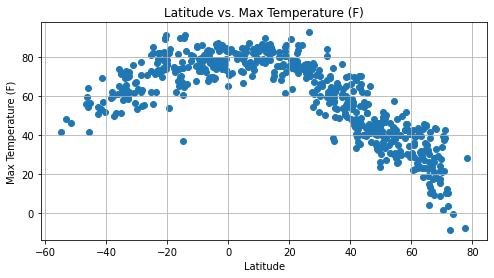

In [43]:
# Size
plt.figure(figsize=(8,4))

# Create Plot
plt.scatter(lat,max_temp)

# Create Labels and Title
plt.title("Latitude vs. Max Temperature (F)")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid(True)

# Display
plt.show()


## Latitude vs. Humidity Plot

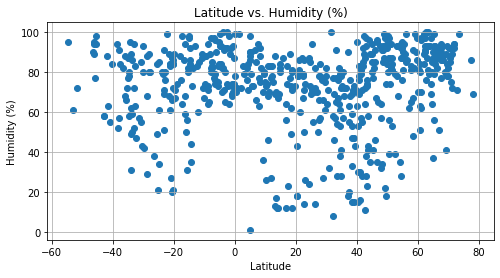

In [44]:
# Size
plt.figure(figsize=(8,4))

# Create Plot
plt.scatter(lat,humidity)

# Create Labels and Title
plt.title("Latitude vs. Humidity (%)")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)

# Display
plt.show()

## Latitude vs. Cloudiness Plot

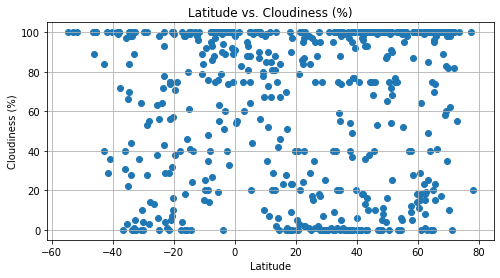

In [45]:
# Size
plt.figure(figsize=(8,4))

# Create Plot
plt.scatter(lat,cloudiness)

# Create Labels and Title
plt.title("Latitude vs. Cloudiness (%)")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)

# Display
plt.show()

## Latitude vs. Wind Speed Plot

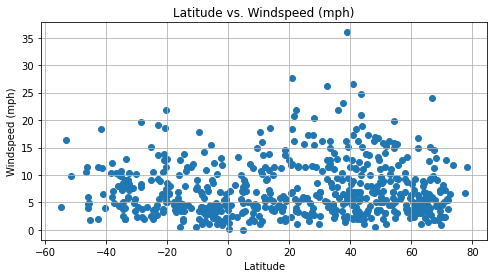

In [46]:
# Size
plt.figure(figsize=(8,4))

# Create Plot
plt.scatter(lat,windspeed)

# Create Labels and Title
plt.title("Latitude vs. Windspeed (mph)")
plt.xlabel('Latitude')
plt.ylabel('Windspeed (mph)')
plt.grid(True)

# Display
plt.show()

## Linear Regression

In [51]:
# Create Northern Hemisphere Dataframe
northern_df=cities_df.loc[cities_df["Latitude"]>=0]

northern_df.head()

,City,Temperature,Humidity,Cloudiness,Windspeed,Latitude,Longitude
5,barrow,10.42,72.0,0.0,12.66,71.2906,-156.7887
6,harper,79.99,84.0,81.0,7.02,4.3750,-7.7169
7,ucluelet,46.09,87.0,100.0,16.73,48.9329,-125.5528
9,haines junction,35.96,63.0,100.0,2.39,60.7522,-137.5108
10,hamilton,58.21,47.0,100.0,9.46,39.1834,-84.5333


In [53]:
northern_df.dtypes

City            object
Temperature    float64
Humidity       float64
Cloudiness     float64
Windspeed      float64
Latitude       float64
Longitude      float64
dtype: object

In [52]:
# Create Southern Hemisphere Dataframe
southern_df=cities_df.loc[cities_df["Latitude"]<0]

southern_df.head()

,City,Temperature,Humidity,Cloudiness,Windspeed,Latitude,Longitude
0,rio gallegos,46.00,72.0,100.0,9.89,-51.6226,-69.2181
1,burnie,56.95,55.0,36.0,6.55,-41.0667,145.9167
2,ushuaia,41.49,95.0,100.0,4.14,-54.8000,-68.3000
3,vaini,82.56,83.0,75.0,12.66,-21.2000,-175.2000
4,olinda,78.53,89.0,40.0,5.75,-8.0089,-34.8553


In [54]:
southern_df.dtypes

City            object
Temperature    float64
Humidity       float64
Cloudiness     float64
Windspeed      float64
Latitude       float64
Longitude      float64
dtype: object

In [55]:
# Create Variables for plotting
north_lat=northern_df["Latitude"]
north_max_temp=northern_df["Temperature"]
north_humidity=northern_df["Humidity"]
north_cloudiness=northern_df["Cloudiness"]
north_windspeed=northern_df["Windspeed"]

south_lat=southern_df["Latitude"]
south_max_temp=southern_df["Temperature"]
south_humidity=southern_df["Humidity"]
south_cloudiness=southern_df["Cloudiness"]
south_windspeed=southern_df["Windspeed"]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

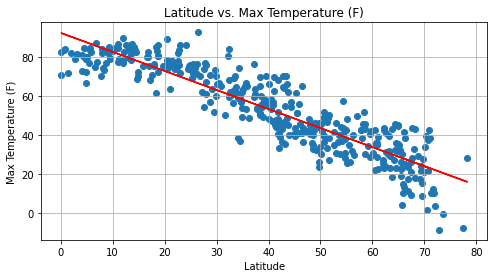

Regression line equation is: y = -0.98x + 92.28
The r-squared is: -0.9045397517937176


In [60]:
#Regression Line
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_lat, north_max_temp)
regress_values = north_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Size
plt.figure(figsize=(8,4))

# Create Plot
plt.scatter(north_lat,north_max_temp)
plt.plot(north_lat,regress_values,"r-")

# Create Labels and Title
plt.title("Latitude vs. Max Temperature (F)")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid(True)

# Display
plt.show()

# Print
print(f"Regression line equation is: {line_eq}")
print(f"The r-squared is: {rvalue}")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

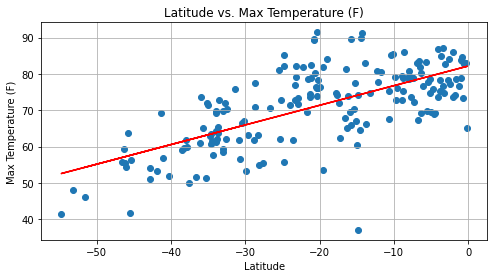

Regression line equation is: y = 0.54x + 82.15
The r-squared is: 0.680068974870181


In [61]:
#Regression Line
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_lat, south_max_temp)
regress_values = south_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Size
plt.figure(figsize=(8,4))

# Create Plot
plt.scatter(south_lat,south_max_temp)
plt.plot(south_lat,regress_values,"r-")

# Create Labels and Title
plt.title("Latitude vs. Max Temperature (F)")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid(True)

# Display
plt.show()

# Print
print(f"Regression line equation is: {line_eq}")
print(f"The r-squared is: {rvalue}")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

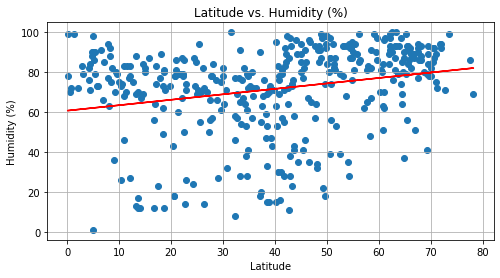

Regression line equation is: y = 0.27x + 60.73
The r-squared is: 0.24495950302693353


In [62]:
#Regression Line
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_lat, north_humidity)
regress_values = north_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Size
plt.figure(figsize=(8,4))

# Create Plot
plt.scatter(north_lat,north_humidity)
plt.plot(north_lat,regress_values,"r-")

# Create Labels and Title
plt.title("Latitude vs. Humidity (%)")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)

# Display
plt.show()

# Print
print(f"Regression line equation is: {line_eq}")
print(f"The r-squared is: {rvalue}")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

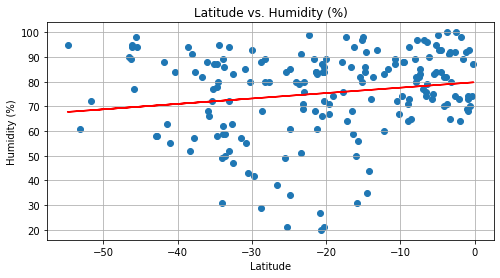

Regression line equation is: y = 0.22x + 79.76
The r-squared is: 0.16956206520456168


In [63]:
#Regression Line
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_lat, south_humidity)
regress_values = south_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Size
plt.figure(figsize=(8,4))

# Create Plot
plt.scatter(south_lat,south_humidity)
plt.plot(south_lat,regress_values,"r-")

# Create Labels and Title
plt.title("Latitude vs. Humidity (%)")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)

# Display
plt.show()

# Print
print(f"Regression line equation is: {line_eq}")
print(f"The r-squared is: {rvalue}")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

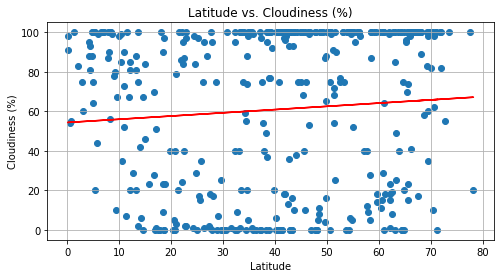

Regression line equation is: y = 0.16x + 54.34
The r-squared is: 0.08116603194738826


In [64]:
#Regression Line
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_lat, north_cloudiness)
regress_values = north_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Size
plt.figure(figsize=(8,4))

# Create Plot
plt.scatter(north_lat,north_cloudiness)
plt.plot(north_lat,regress_values,"r-")

# Create Labels and Title
plt.title("Latitude vs. Cloudiness (%)")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)

# Display
plt.show()

# Print
print(f"Regression line equation is: {line_eq}")
print(f"The r-squared is: {rvalue}")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

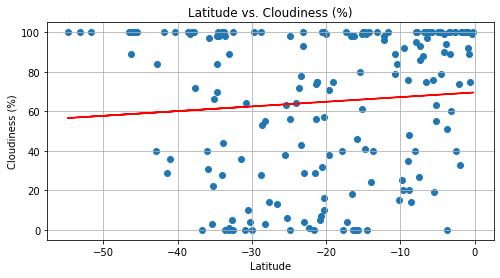

Regression line equation is: y = 0.24x + 69.56
The r-squared is: 0.08662552455657449


In [65]:
#Regression Line
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_lat, south_cloudiness)
regress_values = south_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Size
plt.figure(figsize=(8,4))

# Create Plot
plt.scatter(south_lat,south_cloudiness)
plt.plot(south_lat,regress_values,"r-")

# Create Labels and Title
plt.title("Latitude vs. Cloudiness (%)")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)

# Display
plt.show()

# Print
print(f"Regression line equation is: {line_eq}")
print(f"The r-squared is: {rvalue}")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

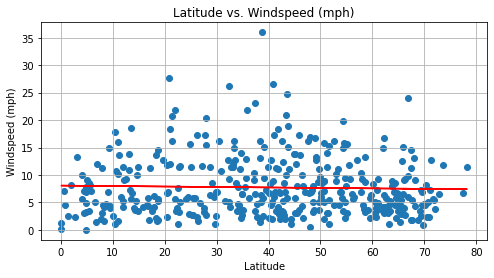

Regression line equation is: y = -0.01x + 8.07
The r-squared is: -0.032022803441044606


In [66]:
#Regression Line
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_lat, north_windspeed)
regress_values = north_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Size
plt.figure(figsize=(8,4))

# Create Plot
plt.scatter(north_lat,north_windspeed)
plt.plot(north_lat,regress_values,"r-")

# Create Labels and Title
plt.title("Latitude vs. Windspeed (mph)")
plt.xlabel('Latitude')
plt.ylabel('Windspeed (mph)')
plt.grid(True)

# Display
plt.show()

# Print
print(f"Regression line equation is: {line_eq}")
print(f"The r-squared is: {rvalue}")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

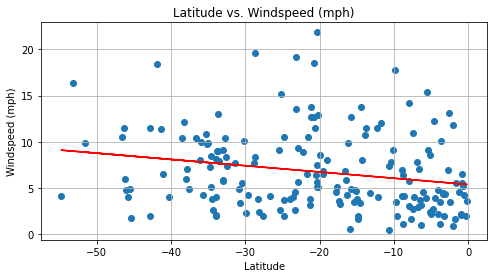

Regression line equation is: y = -0.07x + 5.38
The r-squared is: -0.21660296590208616


In [67]:
#Regression Line
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_lat, south_windspeed)
regress_values = south_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Size
plt.figure(figsize=(8,4))

# Create Plot
plt.scatter(south_lat,south_windspeed)
plt.plot(south_lat,regress_values,"r-")

# Create Labels and Title
plt.title("Latitude vs. Windspeed (mph)")
plt.xlabel('Latitude')
plt.ylabel('Windspeed (mph)')
plt.grid(True)

# Display
plt.show()

# Print
print(f"Regression line equation is: {line_eq}")
print(f"The r-squared is: {rvalue}")